In [22]:
###w중간고사 ~!!!!20220370 박형준

import pygame
import sys 

from math import *
import numpy as np
from numpy.linalg import inv

#setting color 
white = pygame.Color('white')
black = pygame.Color('sky blue')

#setting screen  
width , height = 1000, 600
screen = pygame.display.set_mode((width,height))
screen.fill(black)

pygame.display.update()

clock = pygame.time.Clock()

count = 0.0

a = 0.0
x_center, y_center = width/2, height/2

#physics parameter 
g = 9.81
m1, m2 = 100000000.0, 1.0   #상자의 질량을 매우 크게 해 상자안 진자만 움직이는 단진자 상황이다!
l1, l2 = 1.0, 1.0
t, delta_t = 0.0, 0.01
y = np.array([0.0,0.0,0.0,np.pi/3])   # 상자 안 진자가 0초일떄 60도에서 시작된다. 
L = np.array([[l1,0.0],[0.0,1.0]])
F = np.array([0.0,0.0,0.0,0.0])
b=0.11  # 진자의 공기저항 계수
b_box=0.1 #상자의 공기저항
inv_L = inv(L)

#Slope(G) function
# 수정된 G 함수
def G(t, y):
    
    # 외부에서 작용하는 힘 계산
    if t <= 20.0:
        external_acceleration = 9.8
    elif t <= 45.0:
        external_acceleration = -0.0784 * (t-20)**2 + 1.568 * (t-20) + 9.8   # t=20에서 시작하는 가속도
    elif t <= 75.0:
        external_acceleration = 0.0  # 45초부터 75초까지 무중력
    elif t <= 100.0:
        external_acceleration = -0.0784 * (t-80)**2 + 1.568 * (t-80) + 9.8  # t=80에서 시작하는 가속도
    else:
        external_acceleration = 9.8  # 100초 이후 상수 가속도
       

    F[0] = -m2 * l2 * y[1]**2 * sin(y[2] - y[3]) - (m1 + m2) * external_acceleration * sin(y[2]) 
    F[1] = l1 * y[0]**2 * sin(y[2] - y[3]) - external_acceleration* sin(y[3]) 
    F[2] = y[0]
    F[3] = y[1]
    F_d=-b**l2*y[1]  #상자 안 진자에 대한 선형 공기저항
    F[1]+=F_d    #공기 저항을 반영한 F[1]값 업데이트
    F_d_box=-b_box*l1* y[0]  #상자에 대한 선형 공기저항
    F[0]+=F_d_box    # 상자 공기 저항을 반영한 F[0]값 업데이트

    L = np.array([
        [(m1+m2)*l1, m2*l2*cos(y[2]-y[3]),0.0 ,0.0],
        [l1*cos(y[2]-y[3]),l2,0.0 ,0.0],
        [0.0 , 0.0   ,1.0  ,0.0],
        [0.0,0.0, 0.0, 1.0],
    ])

    return inv(L).dot(F)

#RK4 function 
def RK4(t, y, delta_t):
    k1 = G(t, y)
    k2 = G(t + 0.5*delta_t, y + 0.5*delta_t * k1)
    k3 = G(t + 0.5*delta_t, y + 0.5*delta_t * k2)
    k4 = G(t + 1.0*delta_t, y + 1.0*delta_t * k3)

    return (k1 + 2.0*k2 + 2.0*k3 + k4)/6.0
#1번진자 축
def position(angle1, angle2,angle_up, angle_up2,angle_left, angle_right):
    x1 = 100*l1 * sin(angle1) + x_center
    y1 = 100*l1 * cos(angle1) + y_center
    x2 = 100*l2 * sin(angle2) + x1
    y2 = 100*l2 * cos(angle2) + y1
    #왼쪽 윗변의 위치 
    l1_up=1.5
    l1_left=2
    x_up1= 100*l1_up * sin(angle_up-np.pi/2) + x_center
    y_up1= 100*l1_up* cos(angle_up-np.pi/2) + y_center
    #오른쪽 윗변의 위치
    x_up2= 100 *l1_up* sin(angle_up2+np.pi/2) + x_center
    y_up2= 100 *l1_up* cos(angle_up2+np.pi/2) + y_center
    #왼쪽 변의 위치
    x_left= 100*l1_left*sin(angle_left)+ x_up1
    y_left= 100*l1_left*cos(angle_left)+ y_up1
    #오른쪽 변의 위치
    x_right= 100*l1_left*sin(angle_right)+ x_up2
    y_right= 100*l1_left*cos(angle_right)+ y_up2



    return (x1, y1), (x2, y2) ,(x_up1, y_up1), (x_up2,y_up2) ,(x_left, y_left) ,(x_right,y_right) 


def render(position1_xy, position2_xy, position_up1, position_up2,position_left,position_right):
    screen.fill(black)
   

    pygame.draw.line(screen, white,(x_center, y_center), (position1_xy[0],position1_xy[1]), 3)

    #윗변
    pygame.draw.line(screen, white,(x_center, y_center), (position_up1[0],position_up1[1]), 3)#왼쪽 윗변
    pygame.draw.line(screen, white,(x_center, y_center), (position_up2[0],position_up2[1]), 3)#오른쪽 윗변
    #왼쪽변
    pygame.draw.line(screen, white,(position_up1[0], position_up1[1]), (position_left[0] ,position_left[1]), 3)
    #오른쪽변
    pygame.draw.line(screen, white,(position_up2[0], position_up2[1]), (position_right[0] ,position_right[1]), 3)

    #아래쪽변
    pygame.draw.line(screen, white,(position_left[0], position_left[1]), (position_right[0] ,position_right[1]), 3)
    #상자속 진자
    pygame.draw.line(screen, white,(position1_xy[0], position1_xy[1]), (position2_xy[0],position2_xy[1]), 3)
    pygame.draw.circle(screen, white, (position2_xy[0],position2_xy[1]) , 10)
   
   




while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()
    count += 1

    position1_xy, position2_xy, position_up1,position_up2,position_left,position_right= position(y[2],y[3],y[2],y[2],y[2],y[2])
    render(position1_xy, position2_xy, position_up1, position_up2,position_left,position_right)
   
    t += delta_t
    y = y + delta_t * RK4(t, y, delta_t)

    clock.tick(60)
    pygame.display.update() 

SystemExit: 

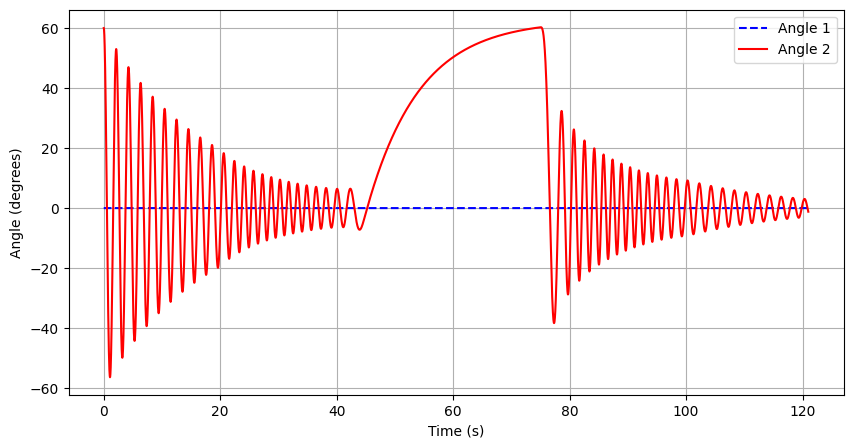

In [25]:
###w중간고사 ~!!!!20220370 박형준

import pygame
import sys 

from math import *
import numpy as np
from numpy.linalg import inv

import matplotlib.pyplot as plt

#setting color 
white = pygame.Color('white')
black = pygame.Color('sky blue')

#setting screen  
width , height = 1000, 600
screen = pygame.display.set_mode((width,height))
screen.fill(black)

pygame.display.update()

clock = pygame.time.Clock()

count = 0.0

a = 0.0
x_center, y_center = width/2, height/2

#physics parameter 
g = 10**12
m1, m2 = 100000000.0, 1.0   #상자의 질량을 매우 크게 해 상자안 진자만 움직이는 단진자 상황이다!
l1, l2 = 1.0, 1.0
t, delta_t = 0.0, 0.01
y = np.array([0.0,0.0,0.0,np.pi/3])   # 상자 안 진자가 0초일떄 60도에서 시작된다. 
L = np.array([[l1,0.0],[0.0,1.0]])
F = np.array([0.0,0.0,0.0,0.0])
b=0.11  # 진자의 공기저항 계수
b_box=0.1 #상자의 공기저항
inv_L = inv(L)

#Slope(G) function
# 수정된 G 함수
def G(t, y):
    
    # 외부에서 작용하는 힘 계산
    if t <= 20.0:
        external_acceleration = 9.8
    elif t <= 45.0:
        external_acceleration = -0.0784 * (t-20)**2 + 1.568 * (t-20) + 9.8   # t=20에서 시작하는 가속도
    elif t <= 75.0:
        external_acceleration = 0.0  # 45초부터 75초까지 무중력
    elif t <= 100.0:
        external_acceleration = -0.0784 * (t-80)**2 + 1.568 * (t-80) + 9.8  # t=80에서 시작하는 가속도
    else:
        external_acceleration = 9.8  # 100초 이후 상수 가속도
       

    F[0] = -m2 * l2 * y[1]**2 * sin(y[2] - y[3]) - (m1 + m2) * external_acceleration * sin(y[2]) 
    F[1] = l1 * y[0]**2 * sin(y[2] - y[3]) - external_acceleration* sin(y[3]) 
    F[2] = y[0]
    F[3] = y[1]
    F_d=-b**l2*y[1]  #상자 안 진자에 대한 선형 공기저항
    F[1]+=F_d    #공기 저항을 반영한 F[1]값 업데이트
    F_d_box=-b_box*l1* y[0]  #상자에 대한 선형 공기저항
    F[0]+=F_d_box    # 상자 공기 저항을 반영한 F[0]값 업데이트

    L = np.array([
        [(m1+m2)*l1, m2*l2*cos(y[2]-y[3]),0.0 ,0.0],
        [l1*cos(y[2]-y[3]),l2,0.0 ,0.0],
        [0.0 , 0.0   ,1.0  ,0.0],
        [0.0,0.0, 0.0, 1.0],
    ])

    return inv(L).dot(F)

#RK4 function 
def RK4(t, y, delta_t):
    k1 = G(t, y)
    k2 = G(t + 0.5*delta_t, y + 0.5*delta_t * k1)
    k3 = G(t + 0.5*delta_t, y + 0.5*delta_t * k2)
    k4 = G(t + 1.0*delta_t, y + 1.0*delta_t * k3)

    return (k1 + 2.0*k2 + 2.0*k3 + k4)/6.0
#1번진자 축
def position(angle1, angle2,angle_up, angle_up2,angle_left, angle_right):
    x1 = 100*l1 * sin(angle1) + x_center
    y1 = 100*l1 * cos(angle1) + y_center
    x2 = 100*l2 * sin(angle2) + x1
    y2 = 100*l2 * cos(angle2) + y1
    #왼쪽 윗변의 위치 
    l1_up=1.5
    l1_left=2
    x_up1= 100*l1_up * sin(angle_up-np.pi/2) + x_center
    y_up1= 100*l1_up* cos(angle_up-np.pi/2) + y_center
    #오른쪽 윗변의 위치
    x_up2= 100 *l1_up* sin(angle_up2+np.pi/2) + x_center
    y_up2= 100 *l1_up* cos(angle_up2+np.pi/2) + y_center
    #왼쪽 변의 위치
    x_left= 100*l1_left*sin(angle_left)+ x_up1
    y_left= 100*l1_left*cos(angle_left)+ y_up1
    #오른쪽 변의 위치
    x_right= 100*l1_left*sin(angle_right)+ x_up2
    y_right= 100*l1_left*cos(angle_right)+ y_up2



    return angle1, angle2


angles1 = []
angles2 = []
times = []

t = 0
delta_t = 0.01
angle_velocities1 = []
angle_velocities2 = []
times = []

while t < 121:
    angle1, angle2 = position(y[2], y[3], y[2], y[2], y[2], y[2])
    angles1.append(angle1)
    angles2.append(angle2)
    times.append(t)
    
    t += delta_t
    y = y + delta_t * RK4(t, y, delta_t)
    a1 = np.degrees(angles1)
    a2 = np.degrees(angles2)
# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(times, np.gradient(a1), label='Angle 1', color='blue', linestyle='dashed')  # 파란색 점선으로 설정
plt.plot(times, np.gradient(a2), label='Angle 2', color='red')  # 빨간색 실선으로 설정
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
# plt.title('Angle Changes Over Time')
plt.legend()
plt.grid(True)
plt.show()
